In [83]:
"""In this file we will implement a function to compute the correlation matrix of the returns of the assets."""

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Importing the dataset
alternative_asset_data = pd.read_excel('/Users/adamelbernoussi/Desktop/EnsaeAlternativeSubject/EnsaeAlternativeTimeSeries.xlsx', sheet_name= 'Alternative Asset')

# Preprocessing
alternative_asset_data = alternative_asset_data[[a for a in list(alternative_asset_data.keys()) if a != 'Infrastructure Equity Listed - USD Unhedged']]
alternative_asset_data.dropna(inplace = True)
list_key_return = []
for key in alternative_asset_data.keys():
    if key != 'QUARTER':
        alternative_asset_data[f'returns {key}'] = alternative_asset_data[key].pct_change(fill_method=None)
        list_key_return.append(f'returns {key}')
alternative_asset_data.dropna(inplace = True)
alternative_asset_data = alternative_asset_data.set_index('QUARTER')
alternative_asset_data = alternative_asset_data[list_key_return]
alternative_asset_data.rename(lambda c: c.replace('returns',''), axis = 1, inplace = True)
alternative_asset_data.rename(lambda c: c.replace('USD Unhedged',''), axis = 1, inplace = True)
alternative_asset_data.rename(lambda c: c.replace('-',''), axis = 1, inplace = True)
alternative_asset_data.rename(lambda c: c.replace('USD Hedged',''), axis = 1, inplace = True)
corr = alternative_asset_data.corr()
styles = [dict(selector="th", props=[("font-size", "4px")])]
corr = corr.style.format(precision = 2).background_gradient(cmap = 'RdYlGn', axis = None).set_table_styles(styles)
corr

,Commodity,Global Property,Hedge Fund DJ,Infrastructure Debt,Infrastructure Equity,Nature Capital,Private Equity,UK Property Direct
Commodity,1.00,0.52,0.73,-0.35,0.59,0.56,0.54,0.48
Global Property,0.52,1.00,0.72,0.02,0.67,0.33,0.92,0.85
Hedge Fund DJ,0.73,0.72,1.00,-0.28,0.71,0.45,0.81,0.65
Infrastructure Debt,-0.35,0.02,-0.28,1.00,-0.12,-0.28,-0.13,-0.02
Infrastructure Equity,0.59,0.67,0.71,-0.12,1.00,0.24,0.73,0.75
Nature Capital,0.56,0.33,0.45,-0.28,0.24,1.00,0.35,0.31
Private Equity,0.54,0.92,0.81,-0.13,0.73,0.35,1.00,0.86
UK Property Direct,0.48,0.85,0.65,-0.02,0.75,0.31,0.86,1.00


<Axes: >

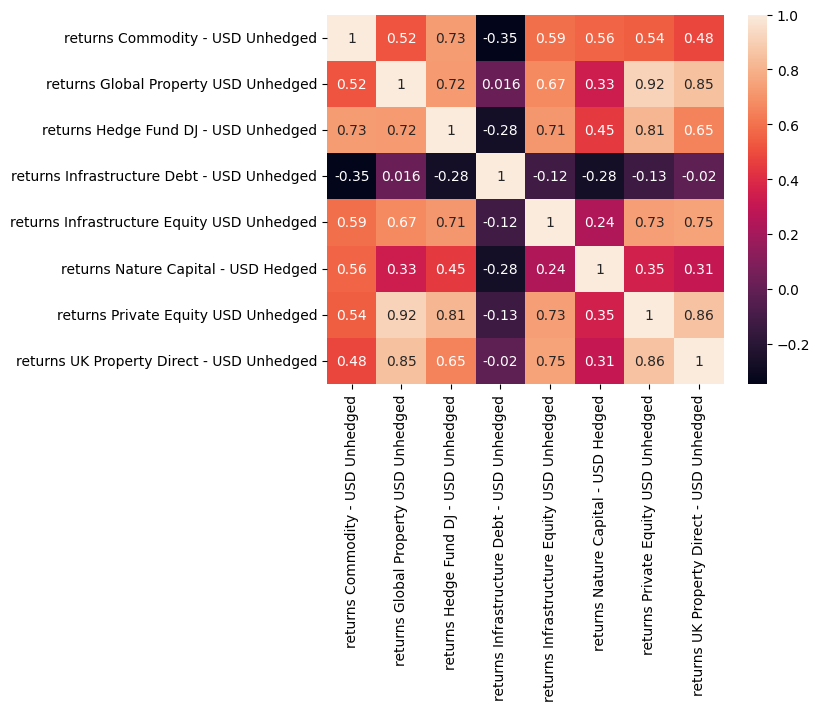

In [4]:
sns.heatmap(alternative_asset_data.corr(), annot = True)